## Fundamental Principles, Assumptions, and Equations Involved

K-means clustering is an unsupervised learning algorithm used to partition a dataset into $K$ clusters. The fundamental principles of K-means clustering involve the following components and steps:

- *Centroids*:
  - Each cluster is represented by a centroid, which is the mean of the points in that cluster.

- *Assignments*:
  - Each data point is assigned to the nearest centroid based on a distance metric, typically Euclidean distance.

- *Iterations*:
  - The algorithm iterates between assigning data points to the nearest centroid and recalculating the centroids based on the current assignments until convergence.

## Mathematical Equations

### Centroid Calculation

For each cluster $k$:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

where:
- $\mu_k$ is the centroid of cluster $k$.
- $C_k$ is the set of points assigned to cluster $k$.
- $x_i$ are the data points in cluster $k$.
- $|C_k|$ is the number of points in cluster $k$.

### Assignment Step

Each data point $x_i$ is assigned to the cluster with the nearest centroid:

$$
C_k = \{ x_i : \| x_i - \mu_k \|^2 \leq \| x_i - \mu_j \|^2, \forall j, 1 \leq j \leq K \}
$$

where:
- $\| x_i - \mu_k \|^2$ is the squared Euclidean distance between data point $x_i$ and centroid $\mu_k$.
- $K$ is the total number of clusters.

### Objective Function

The objective of K-means is to minimize the within-cluster sum of squares (WCSS):

$$
\min \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

## How the Model Learns from Data and Makes Predictions

1. *Initialization*:
   - Randomly select $K$ initial centroids from the data points.

2. *Assignment Step*:
   - Assign each data point to the nearest centroid based on the Euclidean distance.

3. *Update Step*:
   - Recalculate the centroids as the mean of the points assigned to each cluster.

4. *Repeat*:
   - Repeat the assignment and update steps until the centroids do not change significantly (convergence) or for a fixed number of iterations.

5. *Predict*:
   - For a new data point, assign it to the nearest centroid based on the Euclidean distance.


Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix, accuracy_score

Function to initialise centeroids

In [2]:
def initialize_centroids(X, k):
    """ Randomly initialize k centroids from the data points. """
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

Function to assign centeroids

In [3]:
def assign_clusters(X, centroids):
    """ Assign each data point to the nearest centroid. """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

Function to update centeroids

In [4]:
def update_centroids(X, labels, k):
    """ Update centroids as the mean of assigned data points. """
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

Function to implement KMeans

In [5]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    """ Perform k-means clustering. """
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

Function to implement Elbow Method to find optimal k

In [6]:
from sklearn.cluster import KMeans

def plot_elbow_method(X, max_k=10):
    """ Plot the elbow method graph to determine the optimal number of clusters. """
    inertias = []
    K = range(1, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        inertias.append(kmeans.inertia_)
    dx = np.diff(list(K))
    dy = np.diff(list(inertias))
    slope = dy / dx
    slope_diff = np.diff(slope)
    elbow_idx = np.argmax(slope_diff) + 1
    
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return elbow_idx+1




Reading and concating the training and testing dataset

In [7]:
file_path="C:/Users/DELL/Downloads/data2_train.csv"
df1=pd.read_csv(file_path)
file_path="C:/Users/DELL/Downloads/data2_test.csv"
df2=pd.read_csv(file_path)
df=pd.concat([df1,df2])


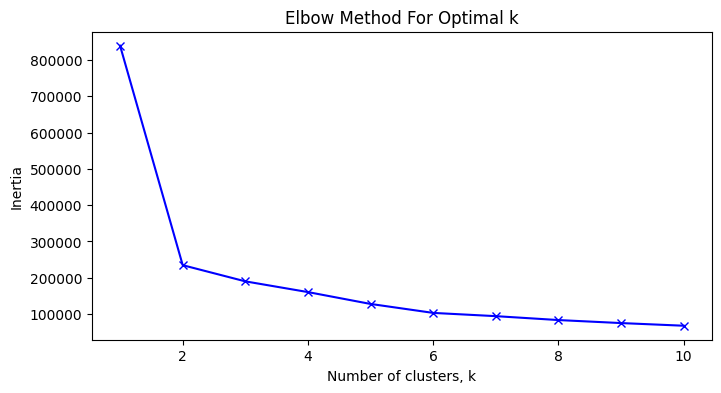

2


In [8]:
# Extract the three numerical columns from the DataFrame
X = df[['Feature_1', 'Feature_2']].values


# Set the number of clusters
k = plot_elbow_method(X)
print (k)

# Run k-means algorithm
centroids, labels = kmeans(X, k)
df['Cluster'] = labels

Plot the clustered data and centroids in 3D

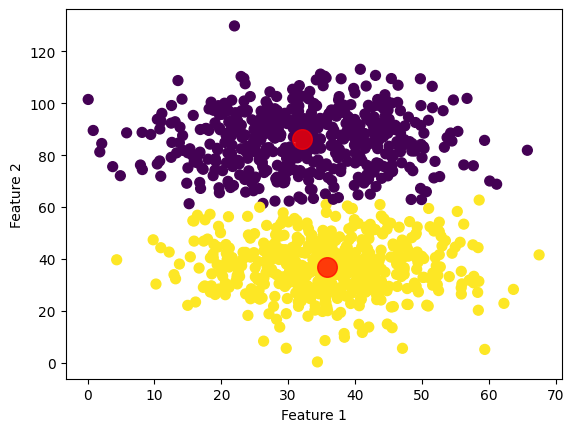

In [9]:

# Plot the clustered data and centroids in 2D
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)

# Labeling the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

Calculating the accuracy of KMeans algorithm from scratch

In [10]:
# Compute the confusion matrix
conf_mat = confusion_matrix(df['Target'], df['Cluster'])

# Use the Hungarian algorithm to find the best matching
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Reorder the cluster labels to match the true labels
new_labels = np.zeros_like(labels)
for i, j in zip(row_ind, col_ind):
    new_labels[labels == j] = i

# Calculate the accuracy
accuracy = accuracy_score(df['Target'], new_labels)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


Calculating the accuracy of KMeans using Scikit learn 

In [11]:
# Run k-means algorithm using scikit-learn
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Compute the confusion matrix
conf_mat = confusion_matrix(df['Target'], df['Cluster'])

# Use the Hungarian algorithm to find the best matching
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Reorder the cluster labels to match the true labels
new_labels = np.zeros_like(labels)
for i, j in zip(row_ind, col_ind):
    new_labels[labels == j] = i

# Calculate the accuracy
accuracy = accuracy_score(df['Target'], new_labels)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99
